<center>
    <img src="http://www.relations-publiques.pro/wp-content/uploads/2015/10/logo-Project.png" width="300" alt="projeqtor logo"  />
</center>

# Analyse descriptive ProjeQtor 



 <h2>Contenu</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
    <li><a href="#">Setup librairies</a></li>
    <li><a href="#">Importer les données</a></li>
    <li><a href="#">Préparation des données </a></li>
     <li><a href="#">Etude de correlation </a></li>
    <li><a href="#">Analyse descriptive statistique</a></li>
     <li><a href="#">Analyse données externes - Segmentation Clientéle</a></li>
    
</ol>

</div>
 
<hr>

<h3>Quels sont les variables qui affectent la durée du projet et son dépassement et sa facturation ?</h3> 

## 1. Setup librairies

<p>Importation des librairies : </p>

In [250]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.decomposition import PCA
import sqlite3
from sqlite3 import OperationalError
import psycopg2
from pandas import DataFrame
import pandas_profiling as pp
from scipy.stats import chi2_contingency

<p>Connexion PostgreSQL : </p>

In [251]:
conn = psycopg2.connect(host='localhost',port='5432',database='projeqtor', user='postgres', password='1234')

## 2.Importer les données 

<p>Les données sont importées directement de la base de donnée sur PostgreSQL . </p>
Chargement de la table "fact_project" dans un dataframe : 

In [411]:
cursor = conn.cursor()
cursor.execute("""SELECT * FROM fact_project""")
query_results = cursor.fetchall()
df_fact = DataFrame (query_results,columns=['id','idProject','Phase','Resource','Client','Assignment','CreationDate','Bill','Sector','Project_duration','Delay_Assignment','Delay_Total','NbProject','NbPhases'])
df_fact.head(50)

,id,idProject,Phase,Resource,Client,Assignment,CreationDate,Bill,Sector,Project_duration,Delay_Assignment,Delay_Total,NbProject,NbPhases
0,1,1,39,12,13,143,20180219,1,2,22,0,0,1,1
1,2,1,40,12,13,143,20180219,1,2,22,0,0,1,2
2,3,1,41,12,13,143,20180219,1,2,22,0,0,1,3
3,4,1,42,12,13,143,20180219,1,2,22,0,0,1,4
4,5,1,43,12,13,143,20180219,1,2,22,0,0,1,5
5,6,1,44,12,13,143,20180219,1,2,22,0,0,1,6
6,7,1,45,12,13,143,20180219,1,2,22,0,0,1,7
7,8,1,46,12,13,143,20180219,1,2,22,0,0,1,8
8,9,2,1,18,15,677,20180219,2,1,4,1,1,2,1
9,10,2,2,18,15,677,20180219,2,1,4,1,2,2,2


Chargement de la table "dim_bill" dans un dataframe : 

In [254]:
cursor.execute("""SELECT * FROM dim_bill""")
query_results2 = cursor.fetchall()
df_bill = DataFrame (query_results2,columns=['ID_BILL','id','billingType','paymentDone','paymentDate','paymentAmount','paymentDueDate','paymentsCount','sendDate'])
df_bill.head()

,ID_BILL,id,billingType,paymentDone,paymentDate,paymentAmount,paymentDueDate,paymentsCount,sendDate
0,1,1,mv284M,1,2007-08-03,4KRYli,2007-11-12,0,2008-12-02
1,2,2,x4O9B1,1,2007-05-28,Pckl7U,2008-07-13,0,2008-01-15
2,3,3,XhEMrA,0,2007-01-06,e8Q0HS,2007-05-16,0,2007-01-31
3,4,4,MrjIaF,1,2007-07-23,VmC76A,2008-03-21,0,2007-10-04
4,5,5,rtIJGN,1,2007-08-03,yWxb3D,2008-12-03,0,2008-07-27


Chargement de la table "dim_resource" dans un dataframe : 

In [348]:
cursor.execute("""SELECT * FROM dim_resource""")
query_results3 = cursor.fetchall()
df_resource = DataFrame (query_results3,columns=['ID_Resource','id','name','Profile','Role','capacity','Team'])
df_resource.head()

,ID_Resource,id,name,Profile,Role,capacity,Team
0,1,1,Resource 1,profileAdministrator,None,1.00,None
1,2,2,Resource 2,profileGuest,None,1.00,None
2,3,3,Resource 3,profileProjectLeader,None,1.00,None
3,4,4,Resource 4,profileAdministrator,Manager,1.00,Abacus Team
4,5,5,Resource 5,profileAdministrator,None,1.00,None


## 3. Préparation des données

In [351]:
df_fact.dtypes

id                  int64
idProject           int64
Phase               int64
Resource            int64
Client              int64
Assignment          int64
CreationDate        int64
Bill                int64
Sector              int64
Project_duration    int64
Delay_Assignment    int64
Delay_Total         int64
NbProject           int64
NbPhases            int64
dtype: object

In [382]:
deleted_columns=['id']
df_fact.drop(deleted_columns,axis=1,inplace=True)
df_fact = df_fact.astype({"idProject": object,"Phase":object,"Resource":object,"Client":object,"Assignment":object,"CreationDate":object,"Bill":object,"Sector":object})

In [383]:
df_fact.dtypes

idProject           object
Phase               object
Resource            object
Client              object
Assignment          object
CreationDate        object
Bill                object
Sector              object
Project_duration     int64
Delay_Assignment     int64
Delay_Total          int64
NbProject            int64
NbPhases             int64
dtype: object

In [347]:
df_fact.isnull().sum()

idProject           0
Phase               0
Resource            0
Client              0
Assignment          0
CreationDate        0
Bill                0
Sector              0
Project_duration    0
Delay_Assignment    0
Delay_Total         0
NbProject           0
NbPhases            0
dtype: int64

<AxesSubplot:>

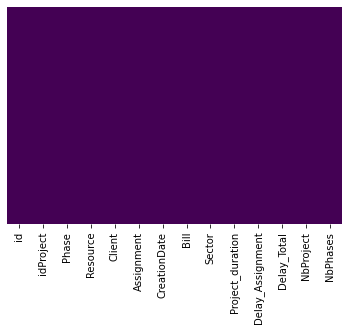

In [366]:
#verification des valeurs manquantes
sns.heatmap(df_fact.isnull(),yticklabels=False, cbar=False,cmap='viridis')

In [367]:
print(df_fact.shape)

(1708, 14)


In [368]:
# Nettoyage des donnees
# si existe des lignes repetes les supprimer
df_fact.duplicated().sum()

0

In [370]:
df_fact.describe(include="object")

,idProject,Phase,Resource,Client,Assignment,CreationDate,Bill,Sector
count,1708,1708,1708,1708,1708,1708,1708,1708
unique,67,324,46,49,287,42,67,4
top,56,161,5,44,1967,20180219,56,4
freq,144,18,179,222,17,246,144,473


In [372]:
df_fact.describe()

,id,Project_duration,Delay_Assignment,Delay_Total,NbProject,NbPhases
count,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000,1708.000000
mean,854.500000,11.954918,2.852459,73.824941,35.801522,29.405738
std,493.201446,9.413732,5.279356,105.534216,18.369566,29.027933
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,427.750000,4.000000,0.000000,0.000000,24.000000,8.000000
50%,854.500000,9.000000,0.000000,20.000000,35.000000,20.000000
75%,1281.250000,18.000000,4.000000,109.000000,49.000000,39.000000
max,1708.000000,36.000000,32.000000,493.000000,67.000000,144.000000


In [384]:
profile = pp.ProfileReport(df_fact,vars={'num':{'low_categorical_threshold': 150} }, title="Projeqtor Descriptive Analysis ",explorative=True) 
#profile.to_file("output.html")
profile

## 4. Etude des correlations

### Categorical variables Analysis - boxplot

<AxesSubplot:xlabel='Sector', ylabel='Project_duration'>

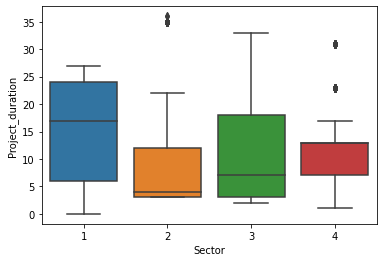

In [327]:
sns.boxplot(x="Sector", y="Project_duration", data=df_fact)

La distribution de la durée de projet entre les secteurs sont différents et distinct ce qui nous aidera à voir l'influence du secteur sur la durée du projet .

<AxesSubplot:xlabel='Sector', ylabel='Delay_Assignment'>

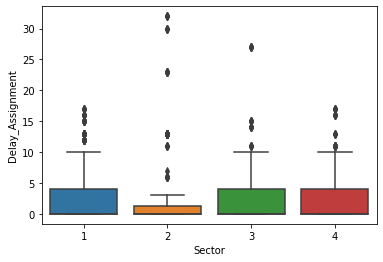

In [331]:
sns.boxplot(x="Sector", y="Delay_Assignment", data=df_fact)

La distribution de la durée de projet entre les secteurs sont similaires  donc la durée du dépassement d'une activité ne peut pas être reliée au secteur .

<h3>Chi-Square</h3>

<b>P-value</b>: 

<p>The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the

<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>


In [472]:
df = [df_fact['idProject'],df_fact['Sector']]
stat, p, dof, expected = chi2_contingency(df)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')
    


p value is 7.988505105373746e-195
Dependent (reject H0)


In [475]:
df = [df_fact['idProject'],df_fact['Resource']]
stat, p, dof, expected = chi2_contingency(df)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')
    


p value is 0.0
Dependent (reject H0)


In [268]:
df = [df_fact['idProject'],df_fact['Bill']]
stat, p, dof, expected = chi2_contingency(df)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 1.0
Independent (H0 holds true)


## 5.Analyse descriptive statistique

In [388]:
df['Phase'].value_counts().to_frame()

,Phase
161,18
263,18
264,18
163,18
162,18
...,...
184,1
39,1
133,1
132,1


In [399]:
df['Sector'].value_counts().to_frame()

,Sector
4,473
1,440
3,423
2,372


In [452]:
df_grp = df_fact[['idProject','NbPhases']]
df_grp = df_grp.groupby(['idProject'],as_index=False).count()
df_grp.head(20)

,idProject,NbPhases
0,1,8
1,2,10
2,4,28
3,5,1
4,6,40
5,7,66
6,8,1
7,10,10
8,11,4
9,13,28


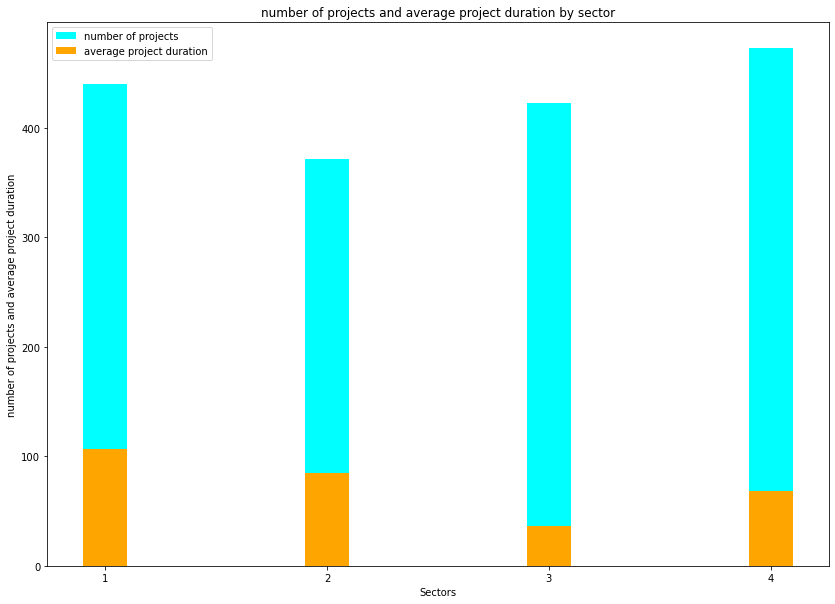

<Figure size 1008x720 with 0 Axes>

In [266]:
# number of projects and average project duration by sector

x=['1','2','3','4']
y1 = df_fact.groupby(['Sector'])['idProject'].count()
y2 = df_fact.groupby(['Sector'])['Delay_Total'].mean()


width = 0.2


# plot data in grouped manner of bar type
plt.figure(figsize=(14,10))
plt.bar(x, y1, width, color='cyan')
plt.bar(x, y2, width, color='orange')
plt.xlabel("Sectors")
plt.ylabel("number of projects and average project duration")
plt.legend(["number of projects", "average project duration"], loc = 'upper left')
plt.title('number of projects and average project duration by sector')
plt.figure(figsize=(14,10))
plt.show()

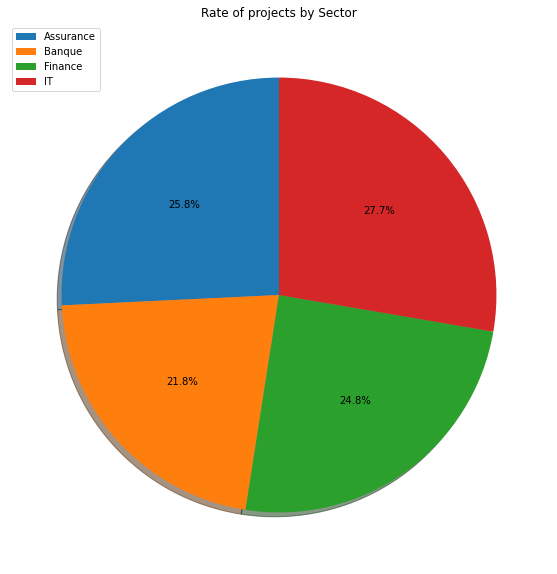

In [267]:
# rate of projects by Sector
y = df_fact.groupby(['Sector'])['idProject'].count()
plt.figure(figsize=(14,10))
plt.pie(y, autopct='%1.1f%%',shadow=True, startangle=90)
plt.legend(["Assurance", "Banque","Finance", "IT"], loc = 'upper left')
plt.title('Rate of projects by Sector')
plt.show()

<AxesSubplot:title={'center':'Durée de projet (m) par secteur'}, xlabel='Sector'>

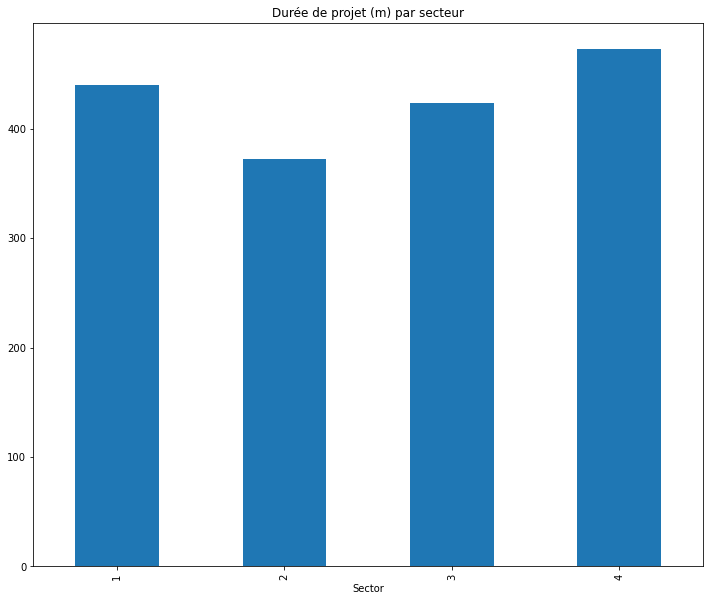

In [480]:
# la duree de projet par secteur
df_project_delayTotal=df_fact.groupby(['Sector'])['Project_duration'].count()
plt.figure(figsize=(12,10))
plt.title("Durée de projet (m) par secteur")
df_project_delayTotal.plot(kind='bar')

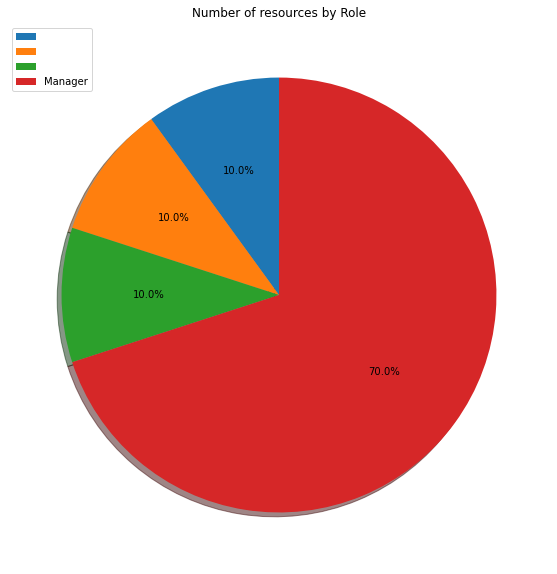

In [496]:
# Number of resources by Role
y = df_resource.groupby(['Role'])['ID_Resource'].count()
plt.figure(figsize=(14,10))
plt.pie(y, autopct='%1.1f%%',shadow=True, startangle=90)
plt.legend(df_resource['Role'], loc = 'upper left')
plt.title('Number of resources by Role')

plt.show()

## 6.Analyse données externes - Segmentation Clientéle

In [499]:
import pandas as pd
import numpy as np 
#import plotly.express as px
import matplotlib.pyplot as plt 

pd.set_option('display.max_columns', None)
missing_values = ["n/a", "na", "--", " ",""] 
df = pd.read_csv("Telco_customer_churn.csv-1.csv", na_values=missing_values , index_col=0) 

In [500]:
df.head()

,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved
7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices


In [501]:
df.drop(['Count','Country','State','City','Zip Code','Lat Long','Latitude','Longitude','Multiple Lines','Internet Service','Online Security','Online Backup','Device Protection','Tech Support','Streaming TV','Streaming Movies','CLTV'],axis=1,inplace=True)

In [502]:
df.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,Churn Reason
CustomerID,,,,,,,,,,,,,,,
3668-QPYBK,Male,No,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,Competitor made better offer
9237-HQITU,Female,No,No,Yes,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,Moved
9305-CDSKC,Female,No,No,Yes,8,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,Moved
7892-POOKP,Female,No,Yes,Yes,28,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,Moved
0280-XJGEX,Male,No,No,Yes,49,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,Competitor had better devices


In [503]:
df['Sector']=np.random.randint(low=1,high=5,size=7043)

In [504]:
df['IDproject']=np.random.randint(low=1,high=400,size=7043)

In [505]:
df['NBproject']=np.random.randint(low=1,high=20,size=7043)

In [506]:
df.shape

(7043, 18)

In [507]:
df.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,Churn Reason,Sector,IDproject,NBproject
CustomerID,,,,,,,,,,,,,,,,,,
3668-QPYBK,Male,No,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,Competitor made better offer,4,140,19
9237-HQITU,Female,No,No,Yes,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,Moved,4,341,3
9305-CDSKC,Female,No,No,Yes,8,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,Moved,1,298,19
7892-POOKP,Female,No,Yes,Yes,28,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,Moved,4,79,6
0280-XJGEX,Male,No,No,Yes,49,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,Competitor had better devices,3,300,12


In [508]:
df["Payment Method"].nunique()
df["Payment Method"].unique()

array(['Mailed check', 'Electronic check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [509]:
df["Contract"].nunique()
df["Contract"].unique()

array(['Month-to-month', 'Two year', 'One year'], dtype=object)

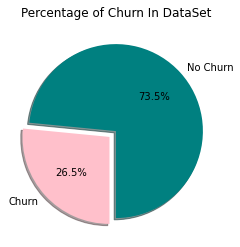

In [510]:
sizes = df['Churn Label'].value_counts(sort = True) 
colors = ["teal","pink"] 
plt.pie(sizes , explode=(0,0.1), labels=['No Churn','Churn'], colors=colors,
       autopct='%1.1f%%', shadow=True , startangle=270,)
plt.title('Percentage of Churn In DataSet') 
plt.show()

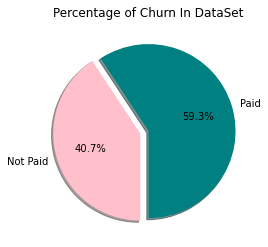

In [557]:
sizes = df['Paperless Billing'].value_counts(sort = True) 
colors = ["teal","pink"] 
plt.pie(sizes , explode=(0,0.1), labels=['Paid','Not Paid'], colors=colors,
       autopct='%1.1f%%', shadow=True , startangle=270,)
plt.title('Percentage of Churn In DataSet') 
plt.show()

In [512]:
title_type = df.groupby('Sector').agg('count')
print(title_type)

        Gender  Senior Citizen  Partner  Dependents  Tenure Months  \
Sector                                                               
1         1814            1814     1814        1814           1814   
2         1675            1675     1675        1675           1675   
3         1786            1786     1786        1786           1786   
4         1768            1768     1768        1768           1768   

        Phone Service  Contract  Paperless Billing  Payment Method  \
Sector                                                               
1                1814      1814               1814            1814   
2                1675      1675               1675            1675   
3                1786      1786               1786            1786   
4                1768      1768               1768            1768   

        Monthly Charges  Total Charges  Churn Label  Churn Value  Churn Score  \
Sector                                                                       

In [513]:
type_labels = title_type.NBproject.sort_values().index

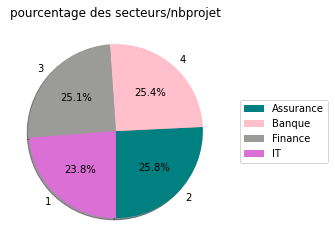

In [514]:

sizes = df['Sector'].value_counts(sort = True) 
colors = ["teal","pink",'#9b9c9a','#DA70D6'] 
plt.pie(sizes , labels=type_labels, colors=colors,
       autopct='%1.1f%%', shadow=True , startangle=270,)
plt.title('pourcentage des secteurs/nbprojet') 
plt.legend(('Assurance','Banque','Finance','IT'),loc="right",bbox_to_anchor=(1, 0, 0.5, 1))
plt.xticks(rotation='vertical',ha='center left')
plt.show()

In [515]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'],errors='coerce')

In [519]:
numerics = df[[
 'Total Charges','Monthly Charges','Tenure Months']]

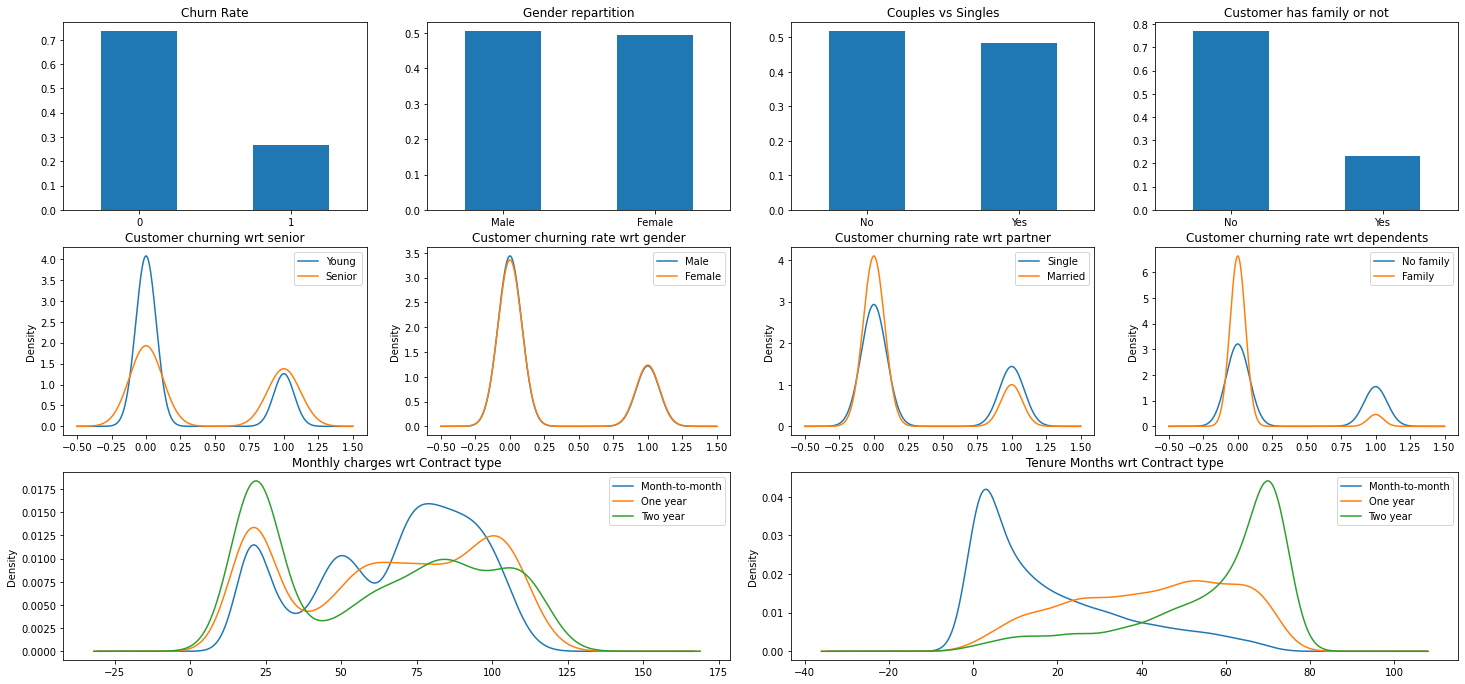

In [520]:
plt.figure(figsize=(25,20))

plt.subplot2grid((5,4),(0,0))
plt.title('Churn Rate')
df['Churn Value'].value_counts(normalize=True).plot(kind='bar')
plt.xticks(rotation=0,ha='center')

plt.subplot2grid((5,4),(0,1))
plt.title('Gender repartition')
df['Gender'].value_counts(normalize=True).plot(kind='bar')
plt.xticks(rotation=0,ha='center')

plt.subplot2grid((5,4),(0,2))
plt.title('Couples vs Singles')
df.Partner.value_counts(normalize=True).plot(kind='bar')
plt.xticks(rotation=0,ha='center')

plt.subplot2grid((5,4),(0,3))
plt.title('Customer has family or not')
df.Dependents.value_counts(normalize=True).plot(kind='bar')
plt.xticks(rotation=0,ha='center')

plt.subplot2grid((5,4),(1,0))
plt.title('Customer churning wrt senior')
df['Churn Value'][df['Senior Citizen'] == "No"].plot(kind='kde')
df['Churn Value'][df['Senior Citizen'] == "Yes"].plot(kind='kde')
plt.legend(('Young','Senior'))
plt.xticks(rotation=0,ha='center')


plt.subplot2grid((5,4),(1,1))
plt.title('Customer churning rate wrt gender')
df['Churn Value'][df['Gender'] == 'Male'].plot(kind='kde')
df['Churn Value'][df['Gender'] == 'Female'].plot(kind='kde')
plt.legend(('Male','Female'))
plt.xticks(rotation=0,ha='center')

plt.subplot2grid((5,4),(1,2))
plt.title('Customer churning rate wrt partner')
df['Churn Value'][df['Partner'] == 'No'].plot(kind='kde')
df['Churn Value'][df['Partner'] == 'Yes'].plot(kind='kde')
plt.legend(('Single','Married'))
plt.xticks(rotation=0,ha='center')

plt.subplot2grid((5,4),(1,3))
plt.title('Customer churning rate wrt dependents')
df['Churn Value'][df['Dependents'] == 'No'].plot(kind='kde')
df['Churn Value'][df['Dependents'] == 'Yes'].plot(kind='kde')
plt.legend(('No family','Family'))
plt.xticks(rotation=0,ha='center')

plt.subplot2grid((5,4),(2,0),colspan=2)
plt.title('Monthly charges wrt Contract type')
df['Monthly Charges'][df.Contract == 'Month-to-month'].plot(kind='kde')
df['Monthly Charges'][df.Contract == 'One year'].plot(kind='kde')
df['Monthly Charges'][df.Contract == 'Two year'].plot(kind='kde')
plt.legend(('Month-to-month','One year','Two year'))
plt.xticks(rotation=0,ha='center')



plt.subplot2grid((5,4),(2,2),colspan=2)
plt.title('Tenure Months wrt Contract type')
df['Tenure Months'][df.Contract == 'Month-to-month'].plot(kind='kde')
df['Tenure Months'][df.Contract == 'One year'].plot(kind='kde')
df['Tenure Months'][df.Contract == 'Two year'].plot(kind='kde')
plt.legend(('Month-to-month','One year','Two year'))
plt.xticks(rotation=0,ha='center')


plt.show()

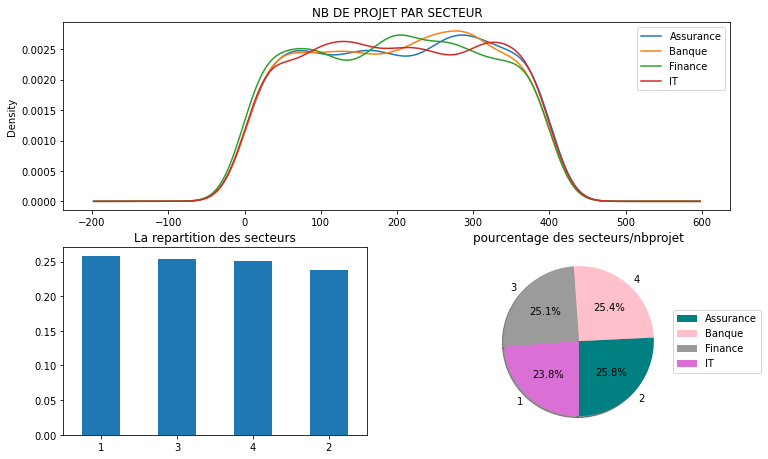

In [521]:
plt.figure(figsize=(25,20))

plt.subplot2grid((5,4),(0,1),colspan=2)
plt.title('NB DE PROJET PAR SECTEUR')
df['IDproject'][df.Sector == 1].plot(kind='kde')
df['IDproject'][df.Sector == 2].plot(kind='kde')
df['IDproject'][df.Sector == 3].plot(kind='kde')
df['IDproject'][df.Sector == 4].plot(kind='kde')
plt.legend(('Assurance','Banque','Finance','IT'))
plt.xticks(rotation=0,ha='center')

plt.subplot2grid((5,4),(1,1))
plt.title('La repartition des secteurs')
df['Sector'].value_counts(normalize=True).plot(kind='bar')
plt.xticks(rotation=0,ha='center')

plt.subplot2grid((5,4),(1,2))
sizes = df['Sector'].value_counts(sort = True) 
colors = ["teal","pink",'#9b9c9a','#DA70D6'] 
plt.pie(sizes , labels=type_labels, colors=colors,
       autopct='%1.1f%%', shadow=True , startangle=270,)
plt.title('pourcentage des secteurs/nbprojet') 
plt.legend(('Assurance','Banque','Finance','IT'),loc="right",bbox_to_anchor=(1, 0, 0.5, 1))
plt.xticks(rotation='vertical',ha='center left')
plt.show()

plt.show()

In [522]:
import seaborn as sns 

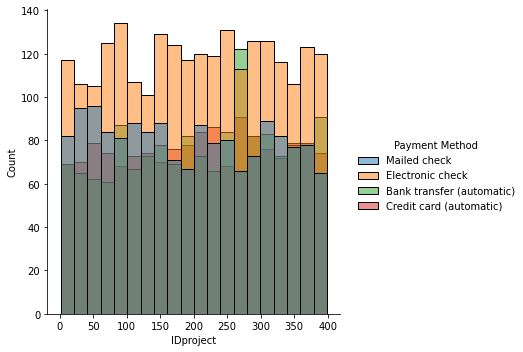

In [523]:
sns.displot(df,x='IDproject', hue='Payment Method',stat="count") 
plt.show()

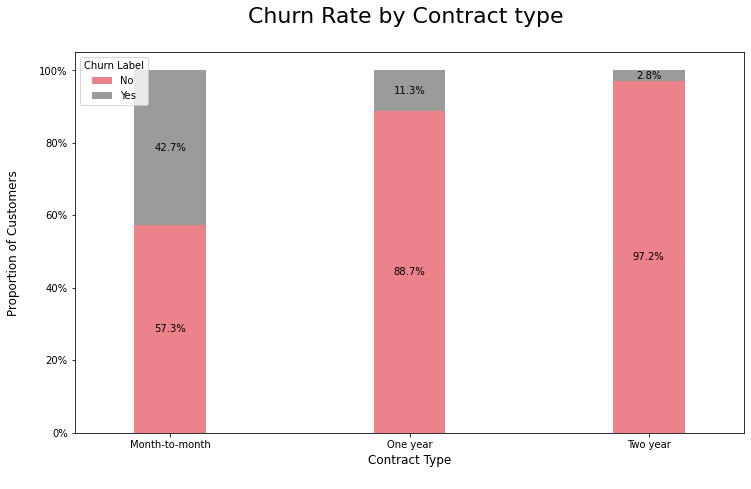

In [524]:
import matplotlib.ticker as mtick
contract_churn =df.groupby(['Contract','Churn Label']).size().unstack()
contract_churn.rename(
columns={0:'No', 1:'Yes'}, inplace=True)
colors  = ['#ec838a','#9b9c9a']
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7),color = colors)
plt.ylabel('Proportion of Customers\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Contract Type\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Churn Rate by Contract type \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)

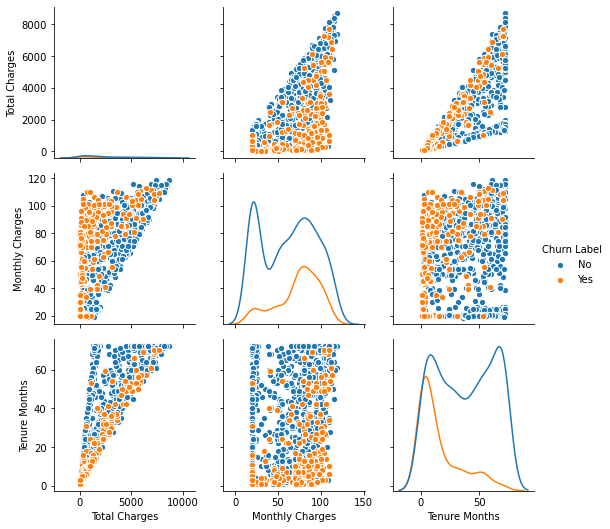

In [525]:
numeric_ds = pd.concat([numerics,df["Churn Label"]],axis=1) 

g = sns.PairGrid(numeric_ds.sample(n=1000), hue="Churn Label")
g = g.map_offdiag(plt.scatter, linewidths=1, edgecolor="w", s=40)
g = g.map_diag(sns.kdeplot)
g = g.add_legend()

In [526]:
df.drop(df[df['Tenure Months'] == 0].index,inplace=True)

In [527]:
cat = []
num = []
for col in df.columns:
    if df[col].dtypes == 'object':
        cat.append(col)
    else:
        num.append(col)

In [528]:
df_cat = df[cat]
df_num = df[num]

In [529]:
df_cat.head()

,Gender,Senior Citizen,Partner,Dependents,Phone Service,Contract,Paperless Billing,Payment Method,Churn Label,Churn Reason
CustomerID,,,,,,,,,,
3668-QPYBK,Male,No,No,No,Yes,Month-to-month,Yes,Mailed check,Yes,Competitor made better offer
9237-HQITU,Female,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,Yes,Moved
9305-CDSKC,Female,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,Yes,Moved
7892-POOKP,Female,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,Yes,Moved
0280-XJGEX,Male,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),Yes,Competitor had better devices


In [530]:
df_num.head()

,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,Sector,IDproject,NBproject
CustomerID,,,,,,,,
3668-QPYBK,2,53.85,108.15,1,86,4,140,19
9237-HQITU,2,70.70,151.65,1,67,4,341,3
9305-CDSKC,8,99.65,820.50,1,86,1,298,19
7892-POOKP,28,104.80,3046.05,1,84,4,79,6
0280-XJGEX,49,103.70,5036.30,1,89,3,300,12


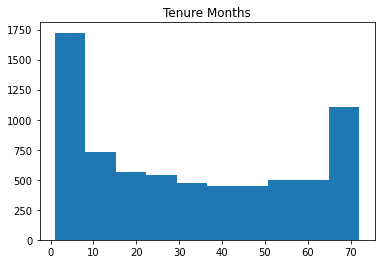

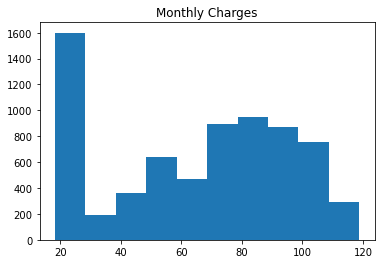

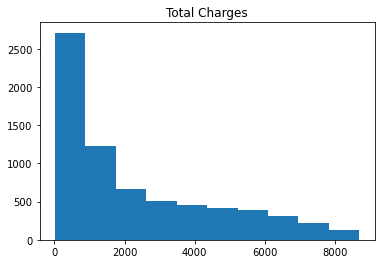

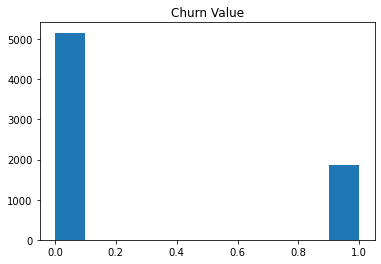

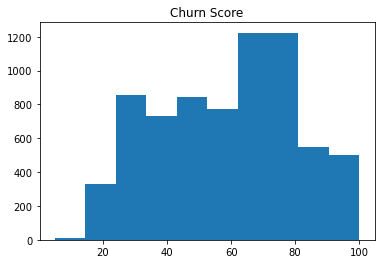

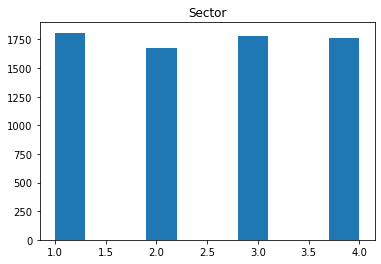

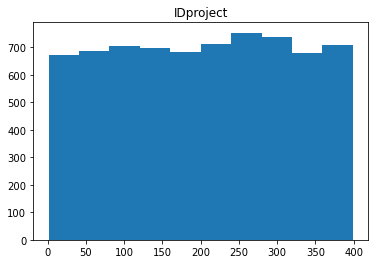

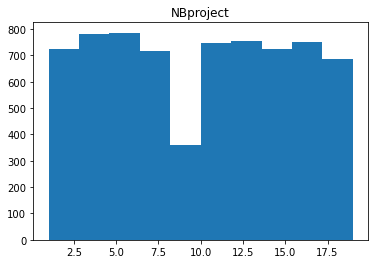

In [531]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

                 Tenure Months  Monthly Charges  Total Charges  Churn Value  \
Tenure Months         1.000000         0.246862       0.825880    -0.354049   
Monthly Charges       0.246862         1.000000       0.651065     0.192858   
Total Charges         0.825880         0.651065       1.000000    -0.199484   
Churn Value          -0.354049         0.192858      -0.199484     1.000000   
Churn Score          -0.226379         0.133556      -0.124312     0.664970   
Sector                0.002967         0.008450       0.011269    -0.005541   
IDproject            -0.003783         0.006301      -0.000016     0.011045   
NBproject             0.017590         0.006933       0.013912    -0.007345   

                 Churn Score    Sector  IDproject  NBproject  
Tenure Months      -0.226379  0.002967  -0.003783   0.017590  
Monthly Charges     0.133556  0.008450   0.006301   0.006933  
Total Charges      -0.124312  0.011269  -0.000016   0.013912  
Churn Value         0.664970 -0.0055

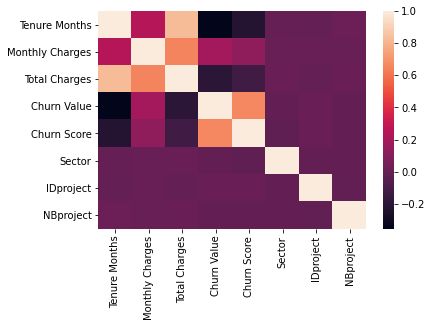

In [532]:
print(df_num.corr())
sns.heatmap(df_num.corr())
plt.show()

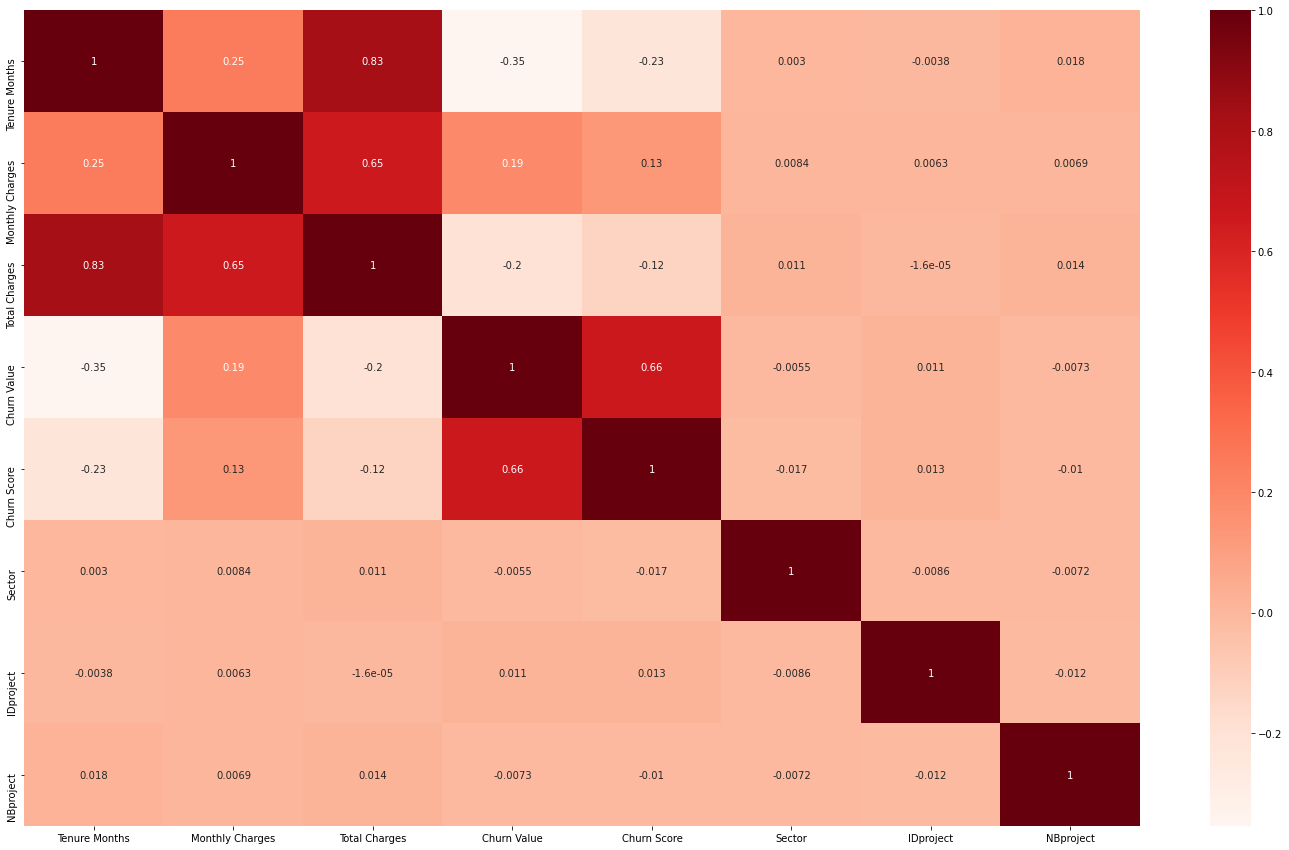

In [533]:
plt.figure(figsize=(25,15))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

 clustering

In [534]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [535]:
df8 = df[num].copy()

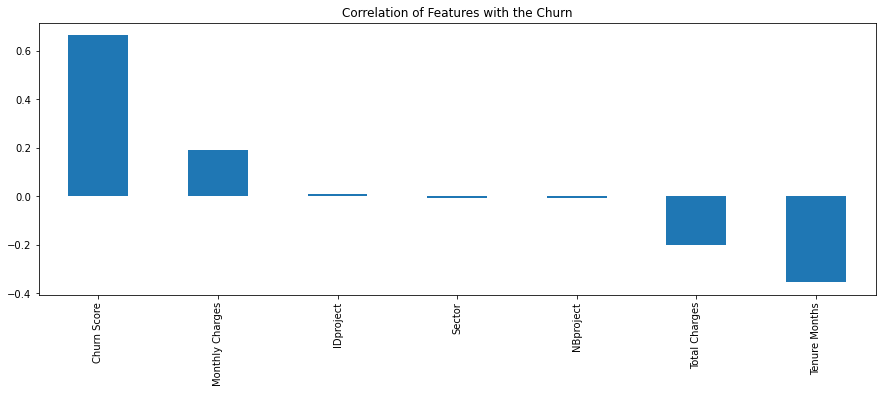

In [536]:
plt.figure(figsize=(15,5))
plt.title("Correlation of Features with the Churn")
col=df8.corr()['Churn Value'].drop(index='Churn Value').sort_values(ascending=False).plot(kind='bar')
plt.show()

In [537]:
mms = MinMaxScaler()
mms.fit(df8)
data_transformed = mms.transform(df8)

In [538]:
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    sum_of_squared_distances.append(km.inertia_)

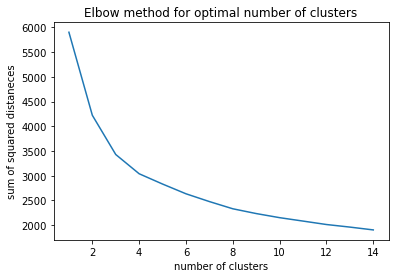

In [539]:
plt.plot(K, sum_of_squared_distances)
plt.xlabel('number of clusters')
plt.ylabel('sum of squared distaneces')
plt.title('Elbow method for optimal number of clusters')
plt.show()

In [540]:
km= KMeans(n_clusters=3)

In [541]:
df9 = df[num].copy()
y_pred = km.fit_predict(df9[['Monthly Charges','Tenure Months']])
df9['cluster'] = y_pred

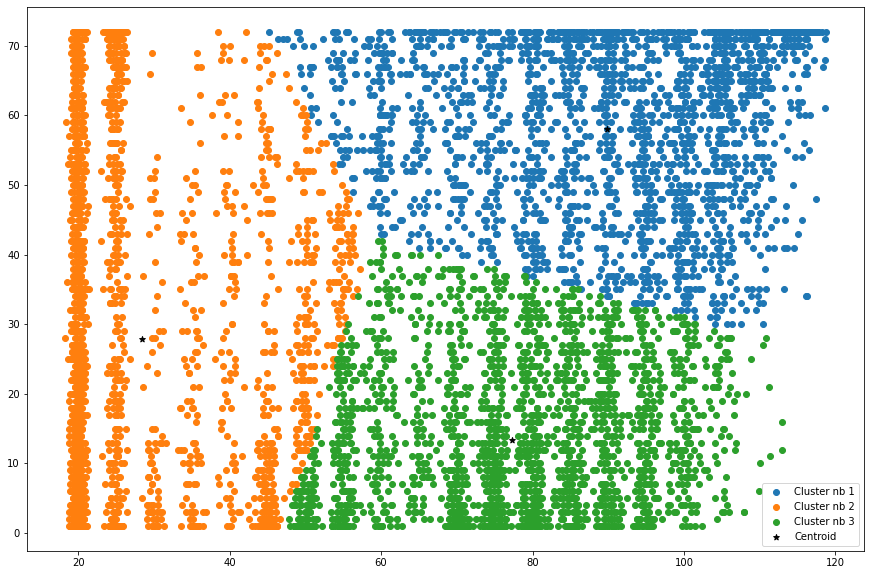

In [542]:
plt.figure(figsize=(15,10))
for i in range(3):
    plt.scatter(df9['Monthly Charges'][df9.cluster==i],df9['Tenure Months'][df9.cluster==i],label='Cluster nb {}'.format(i+1))
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='*',color='black',label='Centroid')
plt.legend()
plt.show()

In [543]:
df9.head()

,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,Sector,IDproject,NBproject,cluster
CustomerID,,,,,,,,,
3668-QPYBK,2,53.85,108.15,1,86,4,140,19,2
9237-HQITU,2,70.70,151.65,1,67,4,341,3,2
9305-CDSKC,8,99.65,820.50,1,86,1,298,19,2
7892-POOKP,28,104.80,3046.05,1,84,4,79,6,2
0280-XJGEX,49,103.70,5036.30,1,89,3,300,12,0


In [544]:
cluster_size = df9.groupby(['cluster'], as_index=False).size()

In [545]:
cluster_size

,cluster,size
0,0,2220
1,1,2371
2,2,2441


In [546]:
from sklearn.preprocessing import MinMaxScaler

In [547]:
monthly_wrt_tenure = df9[['Monthly Charges','Tenure Months']][df9['Churn Value']==1]
scaler_mms = MinMaxScaler()
monthly_wrt_tenure_standardized = pd.DataFrame(scaler_mms.fit_transform(monthly_wrt_tenure))
monthly_wrt_tenure_standardized.columns = ['MonthlyCharges','Tenure']

In [548]:
kmeans = km.fit(monthly_wrt_tenure_standardized)
monthly_wrt_tenure_standardized['cluster'] = kmeans.labels_

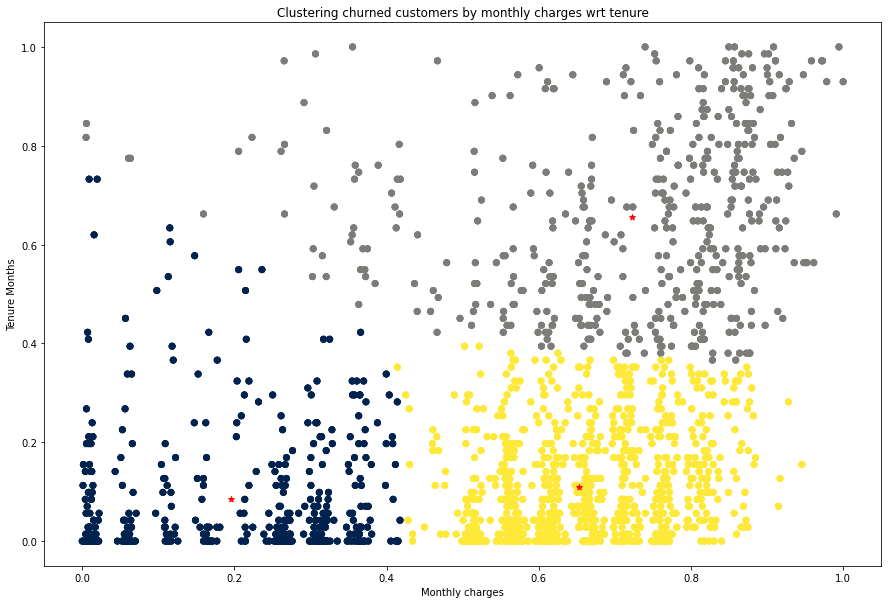

In [549]:
fig, ax = plt.subplots(figsize=(15,10))
for i in range(3):
    plt.scatter(monthly_wrt_tenure_standardized['MonthlyCharges'],monthly_wrt_tenure_standardized['Tenure'],c=monthly_wrt_tenure_standardized['cluster'],cmap='cividis',label='Cluster nb {}'.format(i+1))
plt.title('Clustering churned customers by monthly charges wrt tenure')
plt.xlabel('Monthly charges')
plt.ylabel('Tenure Months')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='*',color='red')
plt.show()

In [550]:
churnscore_wrt_monthlycharges = df9[['Churn Score','Monthly Charges']][df9['Churn Value']==1]
churnscore_wrt_monthlycharges_standardized = pd.DataFrame(scaler_mms.fit_transform(churnscore_wrt_monthlycharges))
churnscore_wrt_monthlycharges_standardized.columns = ['Churn Score','Monthly Charges']

In [551]:
kmeans = km.fit(churnscore_wrt_monthlycharges_standardized)
churnscore_wrt_monthlycharges_standardized['cluster'] = kmeans.labels_

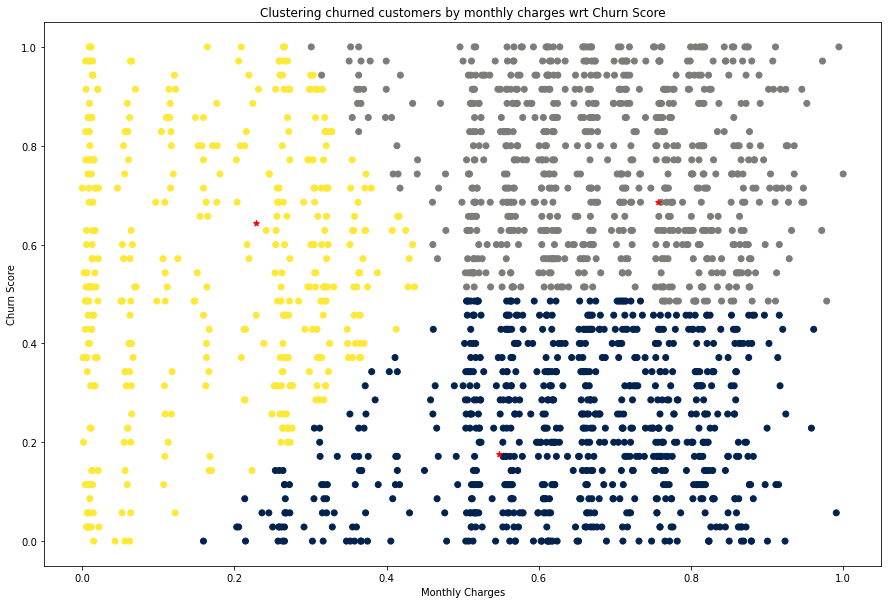

In [552]:
fig, ax = plt.subplots(figsize=(15,10))
plt.scatter(churnscore_wrt_monthlycharges_standardized['Monthly Charges'],churnscore_wrt_monthlycharges_standardized['Churn Score'],c=churnscore_wrt_monthlycharges_standardized['cluster'],cmap='cividis')
plt.title('Clustering churned customers by monthly charges wrt Churn Score')
plt.xlabel('Monthly Charges')
plt.ylabel('Churn Score')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='*',color='red')
plt.show()

In [553]:
cluster0 = df9[df9['cluster']==0]
cluster1 = df9[df9['cluster']==1]
cluster2 = df9[df9['cluster']==2]

In [554]:
cluster0.describe()

,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,Sector,IDproject,NBproject,cluster
count,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.000000,2220.0
mean,58.106306,89.932950,5224.176284,0.155856,55.376577,2.529730,201.983333,9.931532,0.0
std,11.659061,16.753155,1481.870425,0.362800,20.531329,1.129122,113.718263,5.396809,0.0
min,30.000000,45.250000,2531.800000,0.000000,5.000000,1.000000,1.000000,1.000000,0.0
25%,49.000000,79.150000,3968.587500,0.000000,38.000000,2.000000,104.750000,5.000000,0.0
50%,60.000000,92.450000,5039.325000,0.000000,56.000000,3.000000,203.000000,10.000000,0.0
75%,69.000000,104.100000,6350.975000,0.000000,71.000000,4.000000,300.000000,15.000000,0.0
max,72.000000,118.750000,8684.800000,1.000000,100.000000,4.000000,399.000000,19.000000,0.0


In [555]:
cluster1.describe()

,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,Sector,IDproject,NBproject,cluster
count,2371.000000,2371.000000,2371.000000,2371.000000,2371.000000,2371.000000,2371.000000,2371.000000,2371.0
mean,27.895825,28.451097,787.039266,0.150148,54.926613,2.485027,200.719949,9.911430,1.0
std,23.090149,11.320633,722.721898,0.357291,20.571859,1.118735,115.424050,5.478974,0.0
min,1.000000,18.250000,18.800000,0.000000,8.000000,1.000000,1.000000,1.000000,1.0
25%,6.000000,19.950000,156.000000,0.000000,38.000000,1.000000,101.000000,5.000000,1.0
50%,23.000000,23.400000,590.350000,0.000000,56.000000,3.000000,203.000000,10.000000,1.0
75%,47.000000,36.075000,1267.125000,0.000000,71.000000,3.000000,299.500000,15.000000,1.0
max,72.000000,57.150000,3264.450000,1.000000,100.000000,4.000000,399.000000,19.000000,1.0


In [556]:
cluster2.describe()

,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,Sector,IDproject,NBproject,cluster
count,2441.000000,2441.000000,2441.000000,2441.000000,2441.000000,2441.000000,2441.000000,2441.000000,2441.0
mean,13.458828,77.243875,1062.034924,0.478083,65.431790,2.484228,202.858255,9.874642,2.0
std,10.710270,14.664757,874.784703,0.499622,21.731266,1.129276,114.370531,5.486259,0.0
min,1.000000,47.800000,47.950000,0.000000,7.000000,1.000000,1.000000,1.000000,2.0
25%,4.000000,69.000000,257.050000,0.000000,49.000000,1.000000,103.000000,5.000000,2.0
50%,11.000000,77.400000,847.300000,0.000000,70.000000,2.000000,205.000000,10.000000,2.0
75%,22.000000,89.000000,1745.500000,1.000000,81.000000,3.000000,300.000000,15.000000,2.0
max,42.000000,112.950000,3204.400000,1.000000,100.000000,4.000000,399.000000,19.000000,2.0
